#### Importing libraries

In [1]:
print("import libraries")

#to disable notebook warnings
import warnings
warnings.filterwarnings('ignore')

# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data standardization
from sklearn.preprocessing import RobustScaler

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

print("Libraries imported")

import libraries
Libraries imported


In [2]:
## To set display settings
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)

#### Reading data

In [3]:
def read_data(path):
    data = pd.read_csv(path)
    return data

In [4]:
train_data = read_data('./train.csv')
train_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.000,0.500,0.600,1,1,135,87,94,172,300,40,75,16.500,1,1.000,22,25,27,0,1
1,1,70,165,65,89.000,0.600,0.700,2,2,146,83,147,194,55,57,126,16.200,1,1.100,27,23,37,1,0
2,2,20,170,75,81.000,0.400,0.500,1,1,118,75,79,178,197,45,93,17.400,1,0.800,27,31,53,0,1
3,3,35,180,95,105.000,1.500,1.200,1,1,131,88,91,180,203,38,102,15.900,1,1.000,20,27,30,1,0
4,4,30,165,60,80.500,1.500,1.000,1,1,121,76,91,155,87,44,93,15.400,1,0.800,19,13,17,0,1


In [5]:
test_data = read_data('./test.csv')
test_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.000,1.200,1.200,1,1,130,89,107,200,186,49,115,14.200,1,0.900,19,25,32,0
1,159257,80,160,60,93.000,1.000,1.000,2,2,144,72,93,172,158,35,104,13.000,1,1.100,20,12,24,0
2,159258,60,170,70,86.500,0.600,0.700,1,1,117,75,92,161,173,39,88,15.400,1,1.400,38,60,36,0
3,159259,40,160,50,67.000,0.300,0.400,1,1,116,62,91,213,47,75,128,14.500,1,0.600,25,18,10,1
4,159260,40,170,75,89.400,1.000,0.900,1,1,132,94,79,170,100,39,123,16.500,1,1.000,30,39,27,1


In [6]:
## dropping "id" column

train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])


#### Analyzing training data

In [7]:
def analyze_data(data):
    
    print("DataFrame Info:")
    print("=================================")
    display(data.info())
    print("\n")
    
    print("DataFrame Values:")
    print("=================================")
    display(data.head())
    print("\n")
    
    print("DataFrame Desscription")
    print("=================================")
    display(data.describe())
    print("\n")
    
    print("Number of null values")
    print("=================================")
    display(data.isnull().sum())
    print("\n")
    
    print("Number of duplicated values")
    print("==================================")
    display(data.duplicated().sum())
    print("\n")
    
    print("Number of unique values")
    print("==================================")
    display(data.nunique())
    print("\n")
    
    print("Dataframe Shape")
    print("===================================")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    

In [8]:
analyze_data(train_data)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  h

None



DataFrame Values:


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.000,0.500,0.600,1,1,135,87,94,172,300,40,75,16.500,1,1.000,22,25,27,0,1
1,70,165,65,89.000,0.600,0.700,2,2,146,83,147,194,55,57,126,16.200,1,1.100,27,23,37,1,0
2,20,170,75,81.000,0.400,0.500,1,1,118,75,79,178,197,45,93,17.400,1,0.800,27,31,53,0,1
3,35,180,95,105.000,1.500,1.200,1,1,131,88,91,180,203,38,102,15.900,1,1.000,20,27,30,1,0
4,30,165,60,80.500,1.500,1.000,1,1,121,76,91,155,87,44,93,15.400,1,0.800,19,13,17,0,1




DataFrame Desscription


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,"159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000","159,256.000"
mean,44.307,165.267,67.144,83.002,1.006,1.001,1.024,1.023,122.504,76.874,98.353,195.796,127.616,55.853,114.608,14.797,1.074,0.893,25.517,26.550,36.216,0.198,0.437
std,11.842,8.819,12.586,8.958,0.402,0.392,0.153,0.151,12.729,8.995,15.330,28.397,66.189,13.964,28.159,1.431,0.348,0.179,9.465,17.753,31.205,0.398,0.496
min,20.000,135.000,30.000,51.000,0.100,0.100,1.000,1.000,77.000,44.000,46.000,77.000,8.000,9.000,1.000,4.900,1.000,0.100,6.000,1.000,2.000,0.000,0.000
25%,40.000,160.000,60.000,77.000,0.800,0.800,1.000,1.000,114.000,70.000,90.000,175.000,77.000,45.000,95.000,13.800,1.000,0.800,20.000,16.000,18.000,0.000,0.000
50%,40.000,165.000,65.000,83.000,1.000,1.000,1.000,1.000,121.000,78.000,96.000,196.000,115.000,54.000,114.000,15.000,1.000,0.900,24.000,22.000,27.000,0.000,0.000
75%,55.000,170.000,75.000,89.000,1.200,1.200,1.000,1.000,130.000,82.000,103.000,217.000,165.000,64.000,133.000,15.800,1.000,1.000,29.000,32.000,44.000,0.000,1.000
max,85.000,190.000,130.000,127.000,9.900,9.900,2.000,2.000,213.000,133.000,375.000,393.000,766.000,136.000,"1,860.000",21.000,6.000,9.900,778.000,"2,914.000",999.000,1.000,1.000




Number of null values


age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64



Number of duplicated values


0



Number of unique values


age                     18
height(cm)              14
weight(kg)              28
waist(cm)              531
eyesight(left)          20
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               112
relaxation              75
fasting blood sugar    229
Cholesterol            227
triglyceride           392
HDL                    108
LDL                    222
hemoglobin             134
Urine protein            6
serum creatinine        28
AST                    140
ALT                    188
Gtp                    362
dental caries            2
smoking                  2
dtype: int64



Dataframe Shape
Rows: 159256, Columns: 23


#### Remove duplicates

In [9]:
def remove_duplicates(df):
    """
    Remove duplicate rows from a DataFrame and print the number of duplicates found and removed.
    
    Parameters:
    - df: pandas DataFrame

    Returns:
    - df_no_duplicates: DataFrame with duplicates removed
    """

    # Identify duplicates
    duplicates = df[df.duplicated()]

    # Print number of duplicates found and removed
    print(f"Number of duplicates found and removed: {len(duplicates)}")

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    return df_no_duplicates

train_df = remove_duplicates(train_data)

Number of duplicates found and removed: 0


#### Removing outliers

In [10]:
def count_outliers(data,cols):
    for col in cols:
        print(col)
        print("=====================================")
        IQR = np.quantile(data[col],0.75) - np.quantile(data[col],0.25)
        Low_bound = np.quantile(data[col],0.25) - 1.5*IQR
        Upper_bound = np.quantile(data[col],0.75) + 1.5*IQR
        #print(IQR)
        #print(Low_bound)
        #print(Upper_bound)
        #median = np.median(data[col])
        #for col in cols:
        count = 0
        for i in range(len(train_data)):
            cond = data[col][i] < Low_bound or data[col][i] > Upper_bound
            #data[col] = data[col].mask(cond, np.median(data[col]))
            
            if cond:
                count += 1

    
                
        
        print(f'Number of outliers before replacing are {count}')
        print(f'Percentage of outliers present in {col} before replacing are {round((count/len(data))*100,2)}%')
        print("=======================================")

In [11]:
count_outliers(train_data, train_data.columns)

age
Number of outliers before replacing are 682
Percentage of outliers present in age before replacing are 0.43%
height(cm)
Number of outliers before replacing are 463
Percentage of outliers present in height(cm) before replacing are 0.29%
weight(kg)
Number of outliers before replacing are 2296
Percentage of outliers present in weight(kg) before replacing are 1.44%
waist(cm)
Number of outliers before replacing are 858
Percentage of outliers present in waist(cm) before replacing are 0.54%
eyesight(left)
Number of outliers before replacing are 2324
Percentage of outliers present in eyesight(left) before replacing are 1.46%
eyesight(right)
Number of outliers before replacing are 2493
Percentage of outliers present in eyesight(right) before replacing are 1.57%
hearing(left)
Number of outliers before replacing are 3818
Percentage of outliers present in hearing(left) before replacing are 2.4%
hearing(right)
Number of outliers before replacing are 3730
Percentage of outliers present in hearin

In [12]:
def remove_outliers(data,cols):
    for col in cols:
        print(col)
        IQR = np.quantile(data[col],0.75) - np.quantile(data[col],0.25)
        #print(IQR)
        Low_bound = np.quantile(data[col],0.25) - 1.5*IQR
        #print(Low_bound)
        Upper_bound = np.quantile(data[col],0.75) + 1.5*IQR
        #print(Upper_bound)
        median = np.median(data[col])
        #print(median)
        data[col] = np.where(data[col]>Upper_bound, median, data[col])
        data[col] = np.where(data[col]<Low_bound, median, data[col])
        
        count = 0
        for i in range(len(train_data)):
            cond = data[col][i] < Low_bound or data[col][i] > Upper_bound
            #data[col] = data[col].mask(cond, np.median(data[col]))
            
            if cond:
                count += 1

    
                
        
        print(f'Number of outliers After replacing are {count}')
        print("=====================================================")

In [13]:
def draw_boxplots(data,cols):
    for col in cols:
        print("====================================================================")
        print(col)
        data[col].plot(kind="box",figsize=(10,7))
        plt.show()
        print("====================================================================")
    
        

age


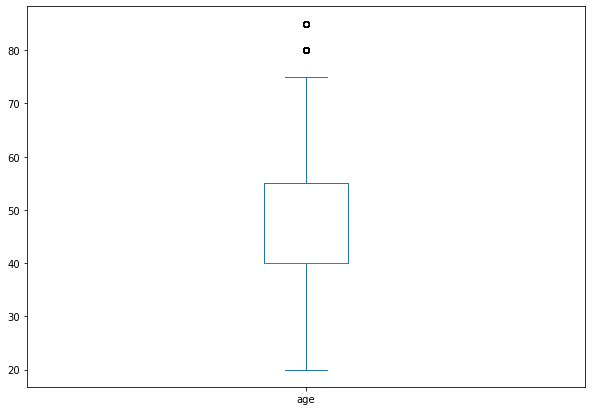

height(cm)


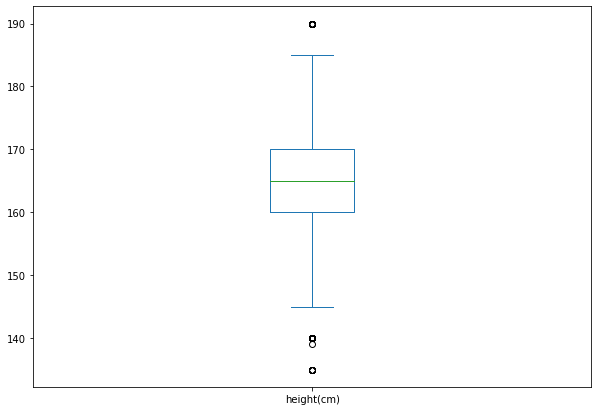

weight(kg)


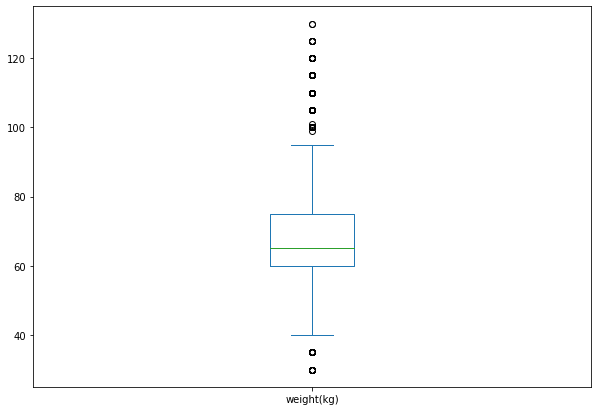

waist(cm)


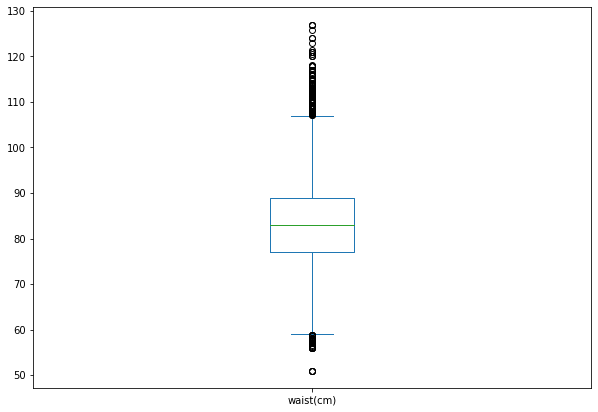

eyesight(left)


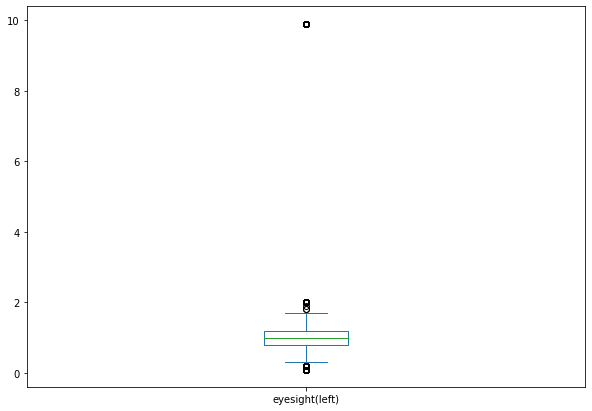

eyesight(right)


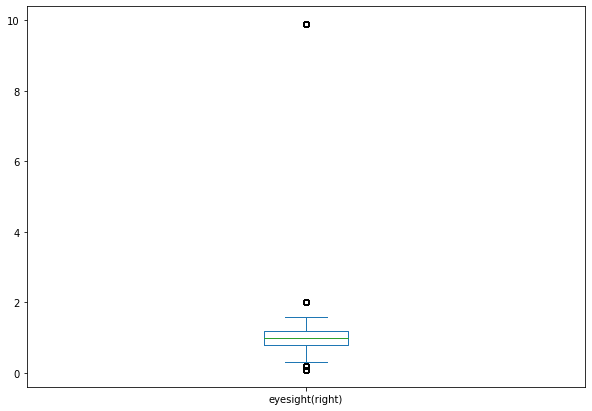

hearing(left)


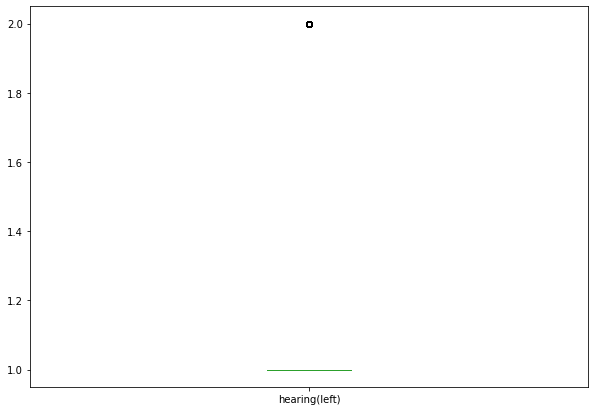

hearing(right)


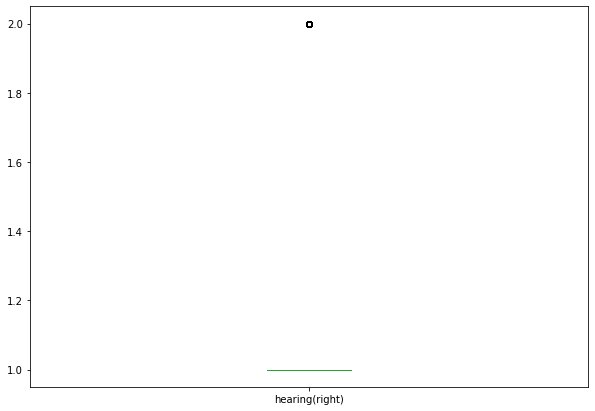

systolic


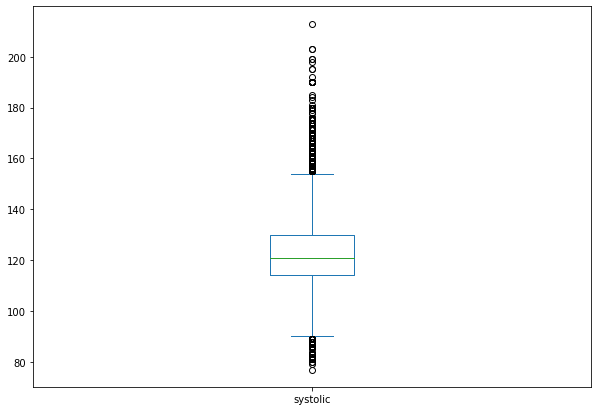

relaxation


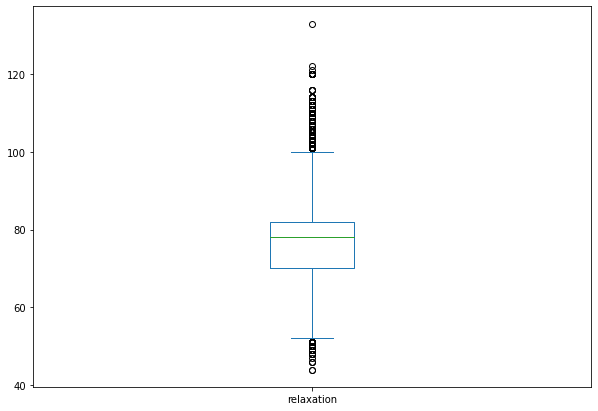

fasting blood sugar


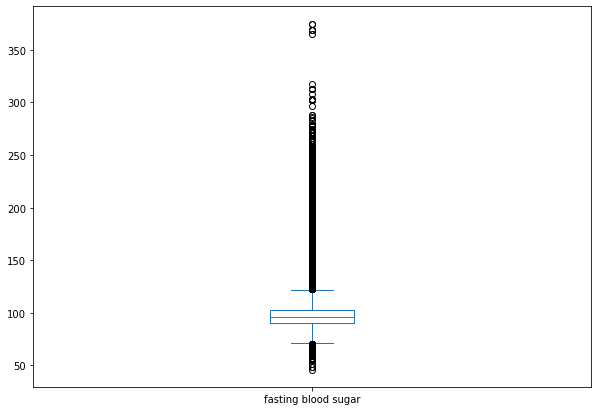

Cholesterol


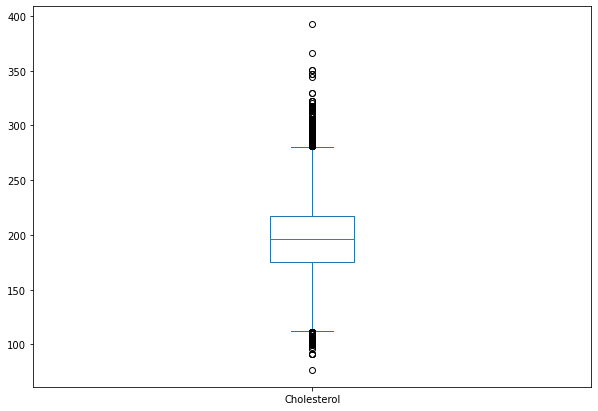

triglyceride


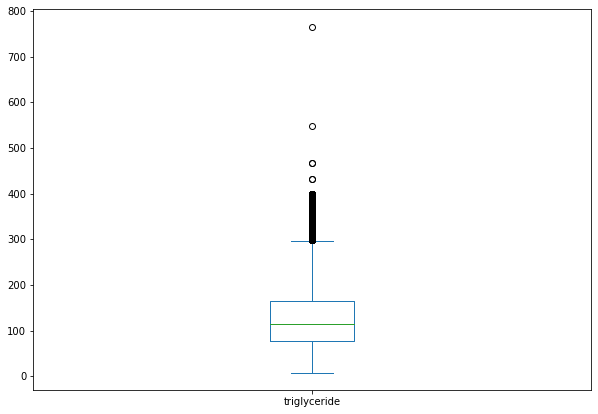

HDL


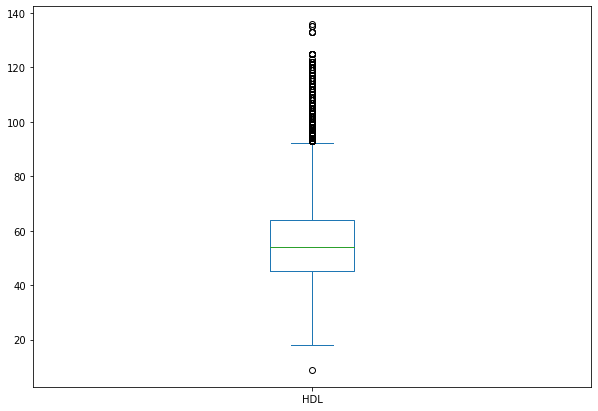

LDL


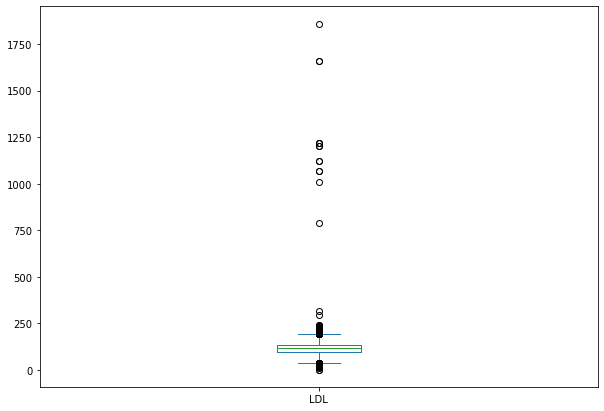

hemoglobin


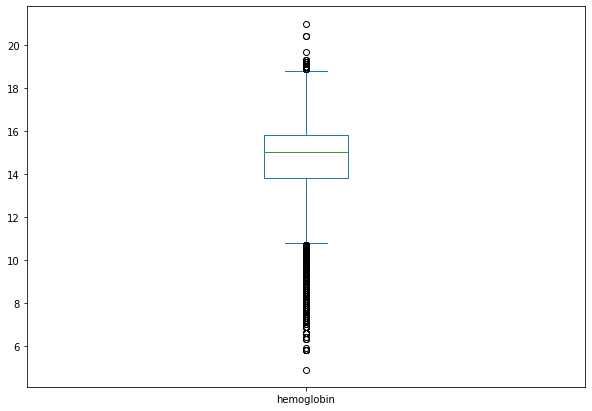

Urine protein


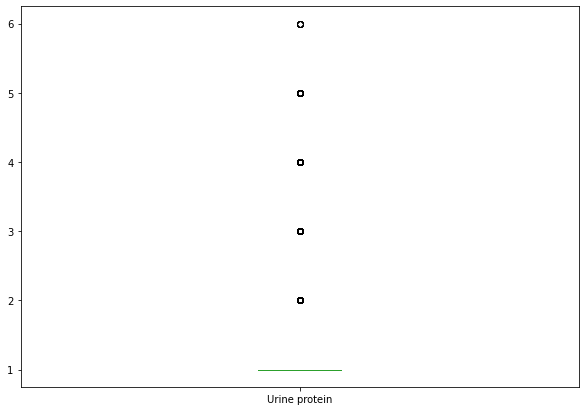

serum creatinine


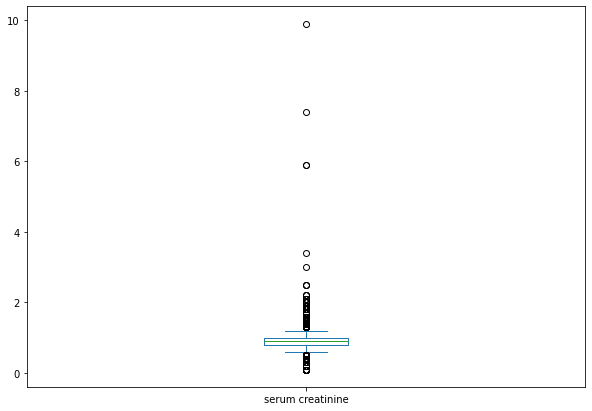

AST


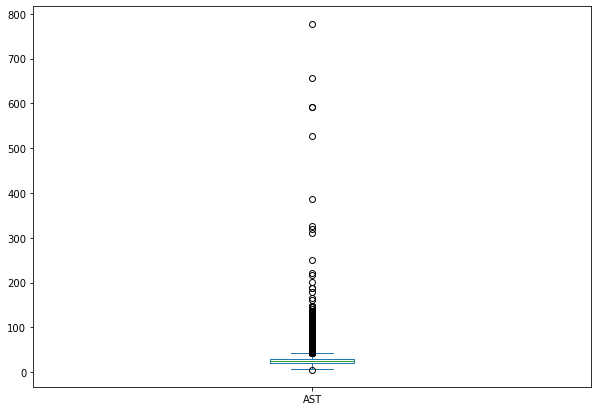

ALT


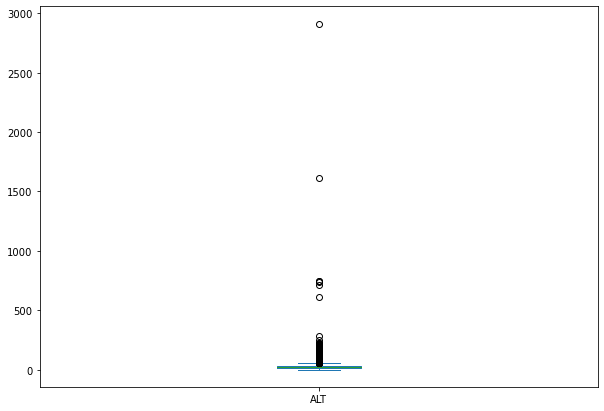

Gtp


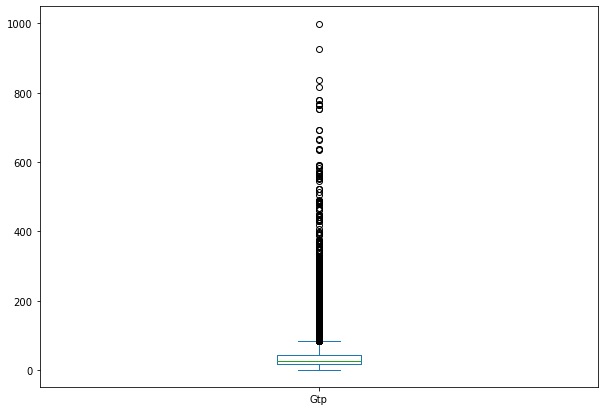

dental caries


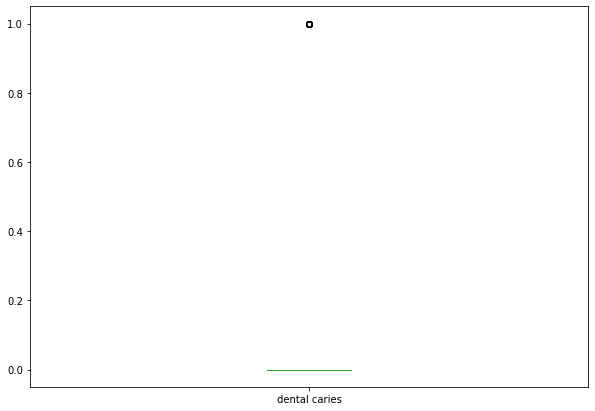

smoking


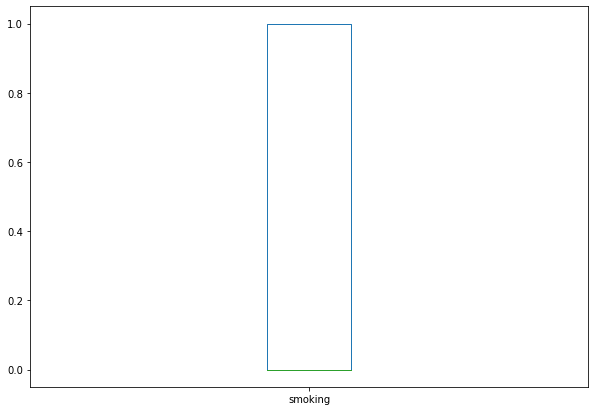

In [14]:
## before removing
draw_boxplots(train_data, train_data.columns)

In [15]:
remove_outliers(train_data,train_data.columns)

age
Number of outliers After replacing are 0
height(cm)
Number of outliers After replacing are 0
weight(kg)
Number of outliers After replacing are 0
waist(cm)
Number of outliers After replacing are 0
eyesight(left)
Number of outliers After replacing are 0
eyesight(right)
Number of outliers After replacing are 0
hearing(left)
Number of outliers After replacing are 0
hearing(right)
Number of outliers After replacing are 0
systolic
Number of outliers After replacing are 0
relaxation
Number of outliers After replacing are 0
fasting blood sugar
Number of outliers After replacing are 0
Cholesterol
Number of outliers After replacing are 0
triglyceride
Number of outliers After replacing are 0
HDL
Number of outliers After replacing are 0
LDL
Number of outliers After replacing are 0
hemoglobin
Number of outliers After replacing are 0
Urine protein
Number of outliers After replacing are 0
serum creatinine
Number of outliers After replacing are 0
AST
Number of outliers After replacing are 0
ALT
Nu

age


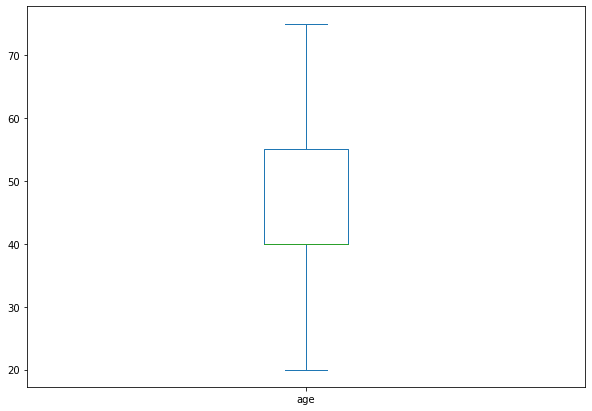

height(cm)


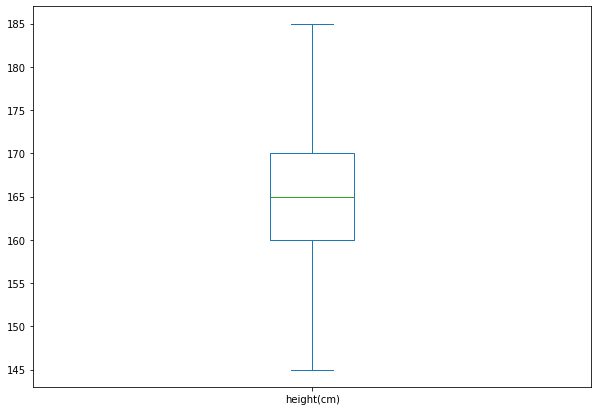

weight(kg)


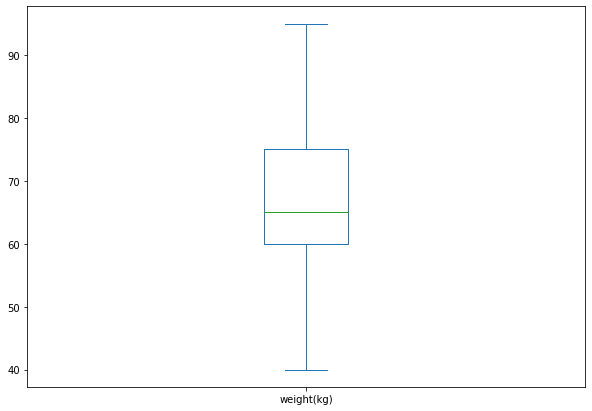

waist(cm)


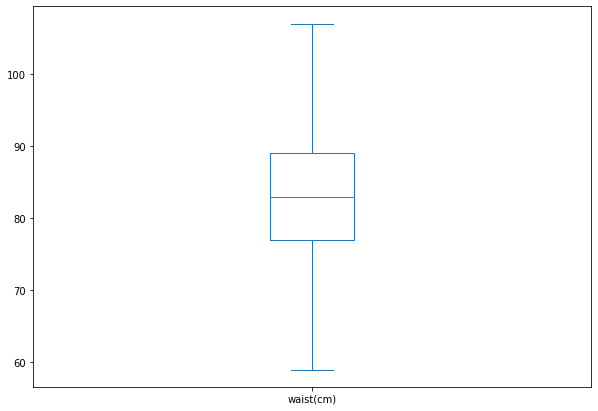

eyesight(left)


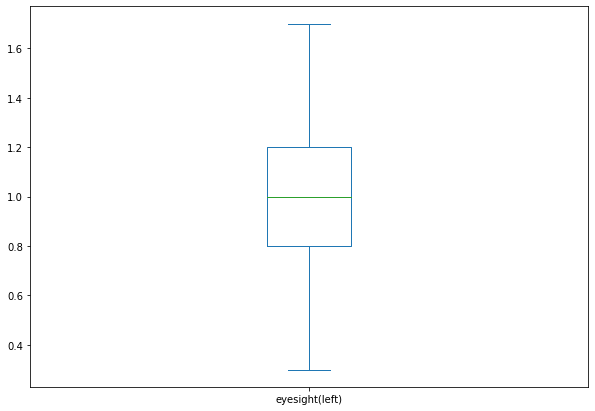

eyesight(right)


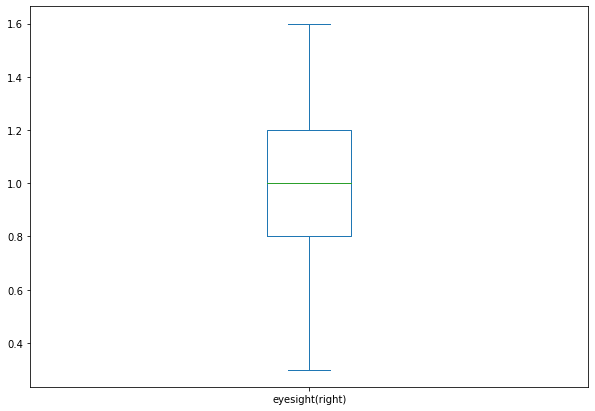

hearing(left)


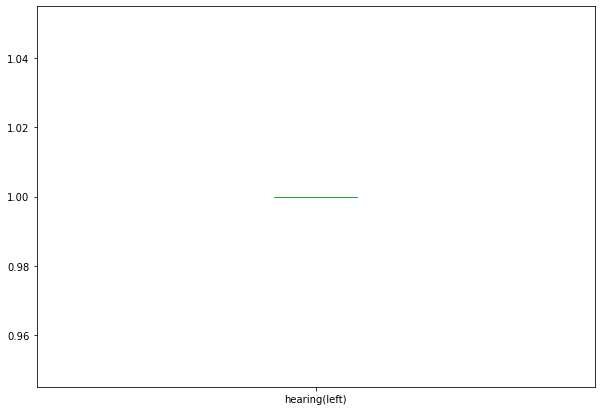

hearing(right)


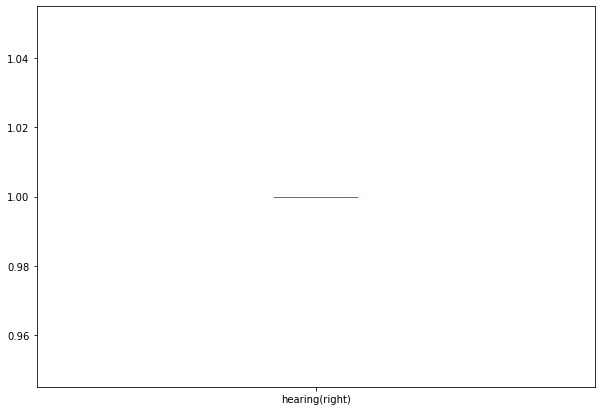

systolic


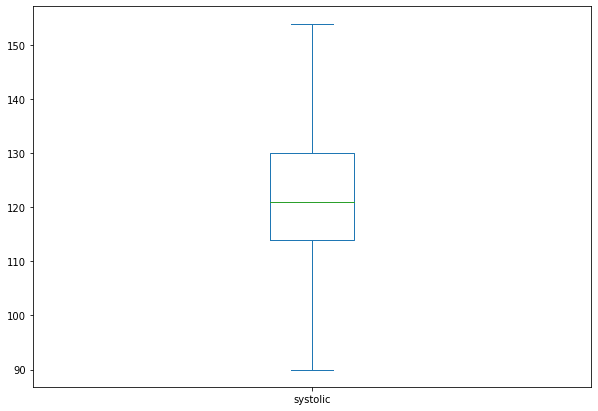

relaxation


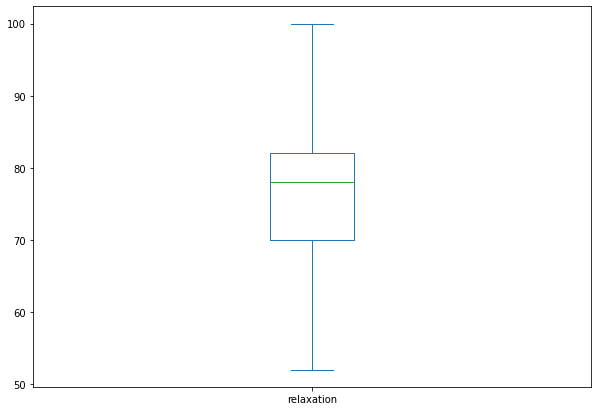

fasting blood sugar


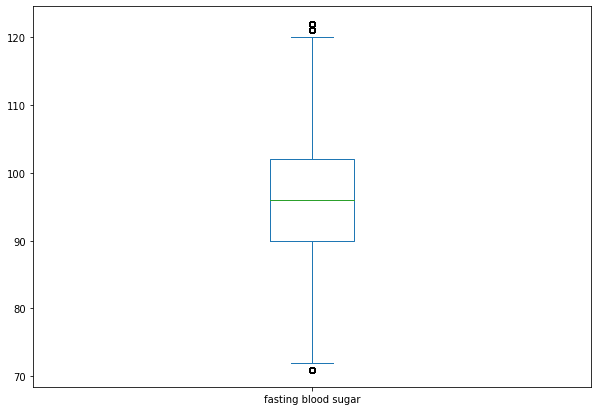

Cholesterol


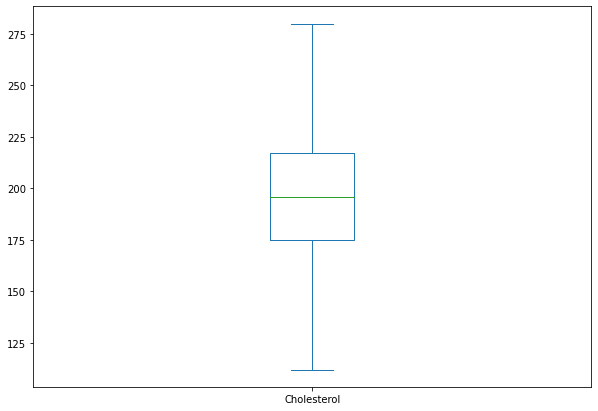

triglyceride


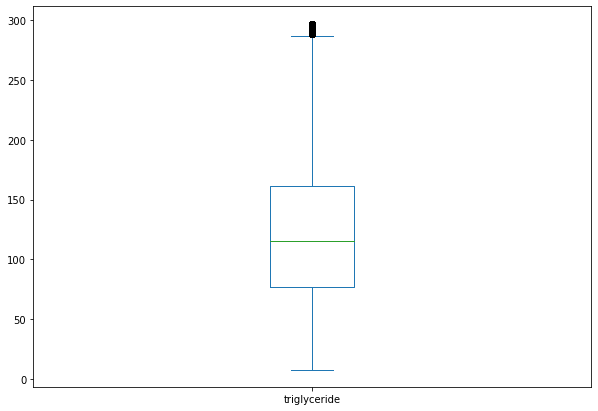

HDL


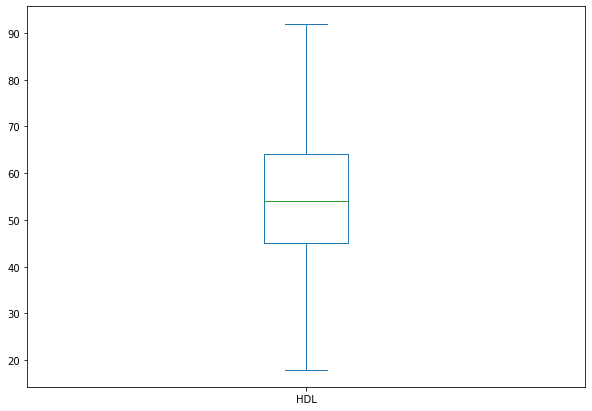

LDL


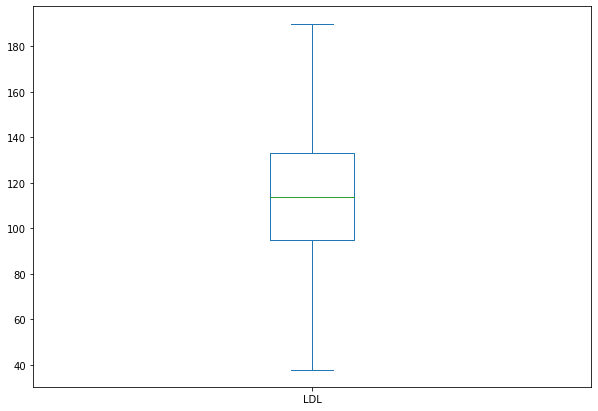

hemoglobin


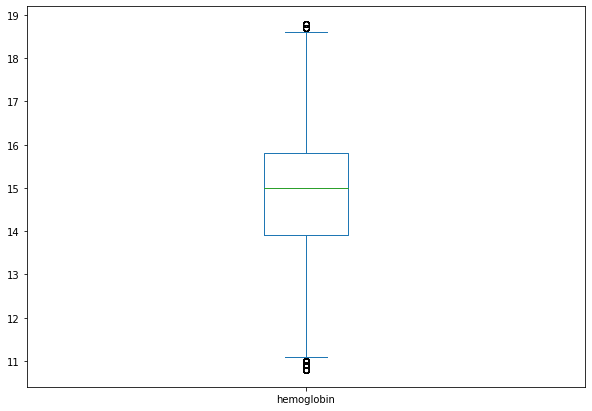

Urine protein


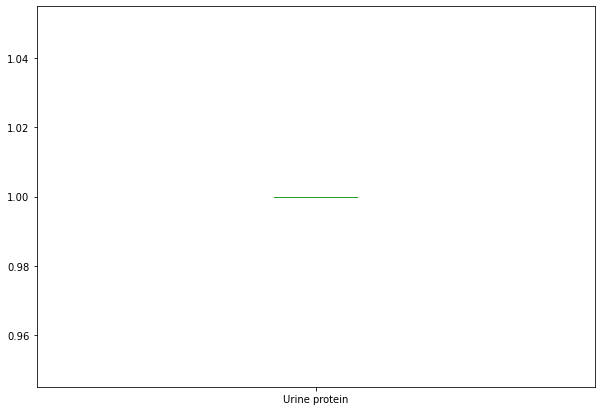

serum creatinine


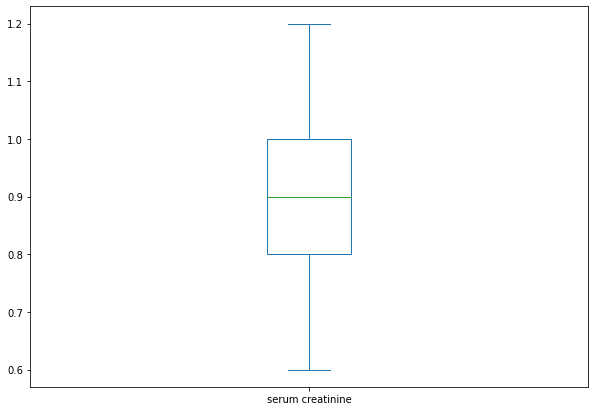

AST


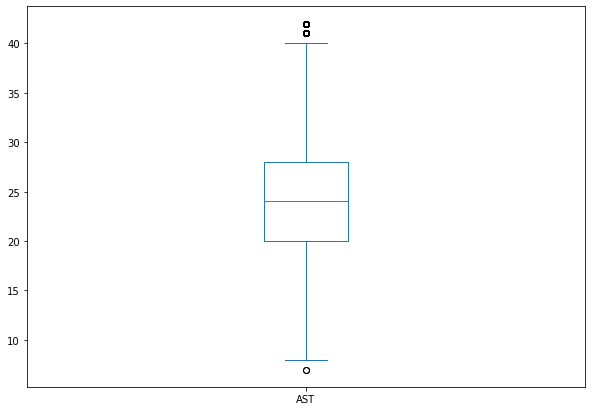

ALT


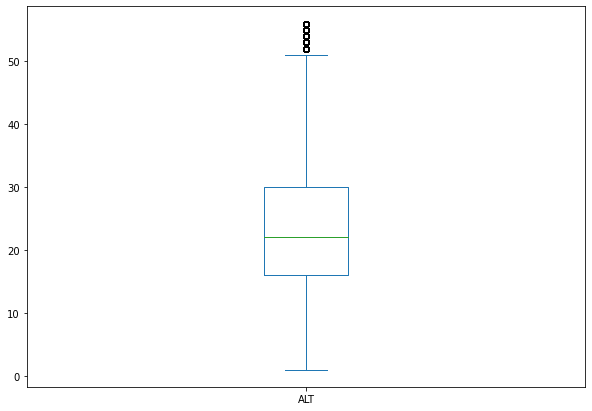

Gtp


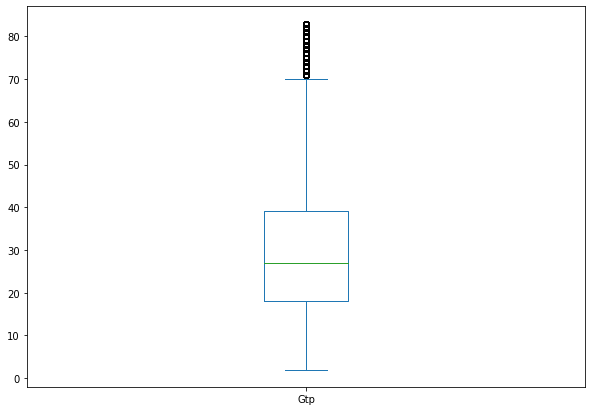

dental caries


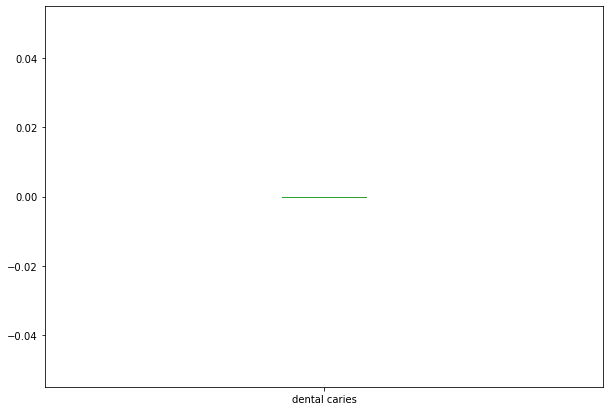

smoking


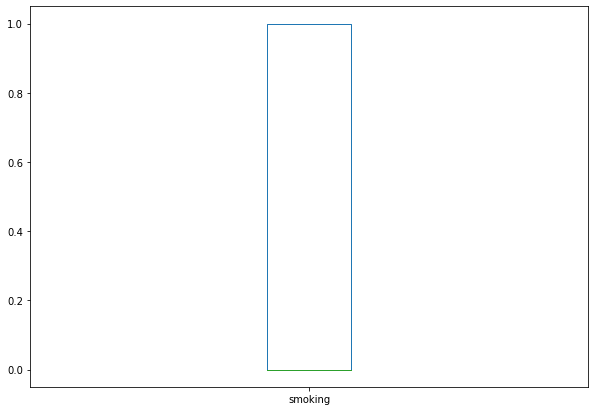

In [16]:
#after removing
draw_boxplots(train_data, train_data.columns)

#### Feature Engineering

In [17]:
def create_feature(data):
    
    # BMI = (weight/height**2)
    data['BMI'] = data['weight(kg)']/((data['height(cm)']/100)**2)
    
    # HW = height/waist
    data['HW_Ratio'] = data['height(cm)']/data['waist(cm)']
    
    #HA = height/age
    data['HA_Ratio'] = data['height(cm)']/data['age']
    
create_feature(train_data)
create_feature(test_data)

#### Feature standardization

In [18]:
def standardize_features(df, features, method='zscore'):
    # Making a copy of the dataframe to avoid changing the original dataframe
    df_copy = df.copy()

    # Selecting the features to be standardized
    data_to_scale = df_copy[features]

    # Choosing the standardization method
    if method == 'zscore':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid method. Choose from 'zscore', 'minmax', or 'robust'.")
    # Applying the standardization
    standardized_data = scaler.fit_transform(data_to_scale)

    # Replacing the original feature values with the standardized values
    df_copy[features] = standardized_data

    return df_copy



In [19]:
model_features = [col for col in train_data.columns if col not in ['id','smoking']]

In [20]:
train_data = standardize_features(train_data, model_features, method = 'robust')
test_data = standardize_features(test_data, model_features, method = 'robust')

In [23]:
#### Final data

In [21]:
train_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,HW_Ratio,HA_Ratio
0,1.000,0.000,-0.333,-0.167,-1.250,-1.000,0.000,0.000,0.875,0.750,-0.167,-0.571,0.000,-0.737,-1.026,0.789,0.000,0.500,-0.250,0.214,0.000,0.000,1.000,-0.535,0.143,-0.621
1,2.000,0.000,0.000,0.500,-1.000,-0.750,0.000,0.000,1.562,0.417,0.000,-0.048,-0.714,0.158,0.316,0.632,0.000,1.000,0.375,0.071,0.476,0.000,0.000,-0.085,-0.564,-1.077
2,-1.333,0.500,0.667,-0.167,-1.500,-1.250,0.000,0.000,-0.188,-0.250,-1.417,-0.429,0.976,-0.474,-0.553,1.263,0.000,-0.500,0.375,0.643,1.238,0.000,1.000,0.424,0.381,3.282
3,-0.333,1.500,2.000,1.833,1.250,0.500,0.000,0.000,0.625,0.833,-0.417,-0.381,1.048,-0.842,-0.316,0.474,0.000,0.500,-0.500,0.357,0.143,0.000,0.000,1.249,-1.103,0.900
4,-0.667,0.000,-0.333,-0.208,1.250,0.000,0.000,0.000,0.000,-0.167,-0.417,-0.976,-0.333,-0.526,-0.553,0.211,0.000,-0.500,-0.625,-0.643,-0.476,0.000,1.000,-0.535,0.192,1.153


In [22]:
test_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI,HW_Ratio,HA_Ratio
0,0.000,0.000,0.333,0.083,0.500,0.500,0.000,0.000,0.562,0.917,0.846,0.095,0.828,-0.263,0.026,-0.400,0.000,0.000,-0.556,0.176,0.192,0.000,0.379,-0.138,0.167
1,2.667,-0.500,-0.333,0.833,0.000,0.000,1.000,1.000,1.438,-0.500,-0.231,-0.571,0.506,-1.000,-0.263,-1.000,0.000,1.000,-0.444,-0.588,-0.115,0.000,-0.199,-1.082,-1.250
2,1.333,0.500,0.333,0.292,-1.000,-0.750,0.000,0.000,-0.250,-0.250,-0.308,-0.833,0.678,-0.789,-0.684,0.200,0.000,2.500,1.556,2.235,0.346,0.000,0.000,-0.134,-0.694
3,0.000,-0.500,-1.000,-1.333,-1.750,-1.500,0.000,0.000,-0.312,-1.333,-0.385,0.405,-0.770,1.105,0.368,-0.250,0.000,-1.500,0.111,-0.235,-0.654,1.000,-1.191,1.502,0.083
4,0.000,0.500,0.667,0.533,0.000,-0.250,0.000,0.000,0.688,1.333,-1.308,-0.619,-0.161,-0.789,0.237,0.750,0.000,0.500,0.667,1.000,0.000,1.000,0.439,-0.381,0.250


In [32]:
### Dependent & independent features

Y = train_data["smoking"]
X = train_data[train_data.columns.drop("smoking")]

In [35]:
### Train test/validation split

#splitting into train and test data
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.2,random_state=100)

X_train.shape, X_valid.shape

((127404, 25), (31852, 25))

In [36]:
#building and training the model
model = LogisticRegression()
model.fit(X_train,Y_train)

#Evaluating the model on the train and test data for R-squared score
train_score = model.score(X_train,Y_train)
test_score = model.score(X_valid, Y_valid)

print("Train score :", train_score)
print("Test score: ",test_score)

Train score : 0.7460911745314119
Test score:  0.7423709657164386
